****Handwritten Digit Prediction****

**Objective**
To identify input digits correctly then analyzed to many automated process systems. This system will be applied to detect the digits of different handwritings.

**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

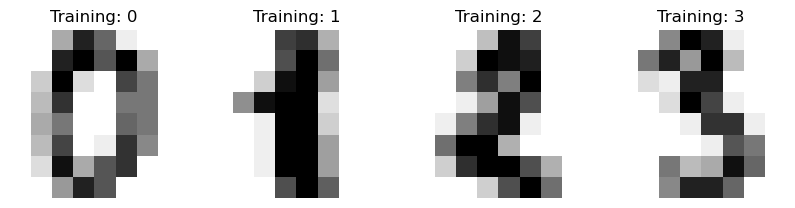

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,df.images,df.target) :
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" % label)

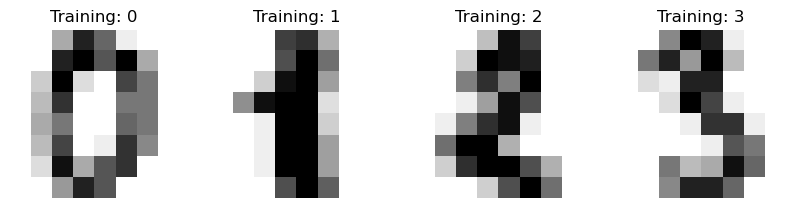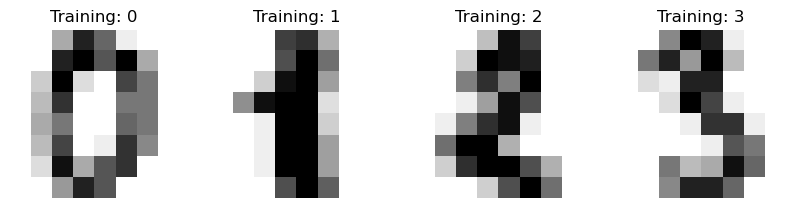

In [7]:
df.images.shape

(1797, 8, 8)

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

(8, 8)

In [10]:
len(df.images)

1797

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

(64,)

In [14]:
data.shape

(1797, 64)

(1797, 64)

In [15]:
data.min()

0.0

0.0

In [16]:
data.max()

16.0

16.0

In [17]:
data=data/16

In [18]:
data.min()

0.0

0.0

In [19]:
data.max()

1.0

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data,df.target,test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

((1257, 64), (540, 64), (1257,), (540,))

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
y_pred

array([3, 3, 5, 1, 5, 0, 1, 1, 8, 4, 3, 5, 5, 3, 2, 7, 6, 9, 9, 6, 0, 4,
       3, 4, 1, 0, 6, 6, 6, 1, 8, 5, 4, 8, 2, 5, 1, 2, 2, 5, 4, 3, 9, 2,
       4, 0, 7, 6, 7, 8, 8, 9, 8, 7, 4, 7, 1, 4, 4, 0, 6, 9, 5, 5, 4, 6,
       4, 1, 4, 8, 8, 2, 0, 7, 4, 1, 3, 8, 0, 3, 3, 9, 7, 3, 8, 7, 9, 7,
       8, 1, 0, 6, 2, 8, 1, 2, 6, 6, 6, 9, 8, 2, 5, 7, 9, 5, 0, 5, 0, 0,
       4, 6, 4, 8, 1, 4, 0, 9, 1, 8, 0, 4, 6, 4, 6, 4, 2, 4, 8, 2, 6, 4,
       6, 7, 1, 7, 2, 5, 6, 1, 1, 8, 6, 8, 0, 4, 5, 1, 8, 1, 7, 7, 0, 3,
       1, 5, 1, 7, 9, 1, 9, 2, 4, 9, 9, 0, 7, 2, 0, 1, 4, 4, 7, 4, 4, 7,
       7, 1, 6, 4, 9, 0, 3, 8, 1, 0, 1, 3, 4, 3, 7, 6, 2, 4, 1, 0, 1, 2,
       7, 6, 7, 6, 0, 8, 6, 0, 1, 3, 3, 9, 2, 1, 3, 1, 4, 1, 2, 0, 9, 9,
       5, 6, 5, 6, 3, 1, 8, 9, 6, 4, 6, 9, 6, 2, 8, 6, 8, 3, 7, 0, 5, 9,
       7, 4, 8, 9, 6, 5, 8, 9, 0, 7, 8, 4, 2, 2, 3, 3, 1, 3, 2, 5, 6, 0,
       4, 3, 2, 8, 8, 9, 6, 6, 1, 3, 8, 7, 1, 7, 8, 5, 3, 9, 1, 5, 5, 8,
       1, 6, 6, 2, 4, 6, 9, 1, 4, 1, 3, 3, 2, 5, 1,

array([5, 1, 0, 6, 8, 7, 7, 6, 0, 6, 8, 8, 0, 7, 9, 3, 5, 3, 9, 3, 8, 1,
       3, 6, 1, 7, 2, 4, 2, 3, 9, 7, 6, 6, 3, 0, 8, 1, 5, 5, 8, 4, 2, 5,
       6, 3, 3, 2, 9, 4, 7, 7, 0, 4, 1, 6, 8, 5, 2, 2, 7, 3, 3, 6, 1, 7,
       2, 3, 3, 7, 1, 1, 5, 6, 8, 6, 0, 3, 6, 7, 2, 3, 5, 9, 2, 2, 6, 1,
       2, 0, 5, 0, 4, 7, 8, 5, 6, 8, 6, 1, 3, 6, 7, 0, 2, 0, 1, 1, 7, 4,
       4, 8, 7, 9, 7, 5, 2, 6, 4, 0, 7, 5, 4, 8, 0, 1, 4, 4, 6, 5, 7, 0,
       5, 5, 5, 4, 7, 5, 3, 4, 9, 5, 1, 2, 3, 0, 7, 8, 9, 5, 6, 4, 6, 5,
       1, 2, 6, 3, 2, 2, 0, 7, 0, 8, 9, 1, 2, 7, 2, 5, 7, 1, 1, 9, 0, 8,
       9, 5, 3, 0, 8, 5, 2, 9, 4, 1, 9, 8, 2, 7, 4, 8, 2, 2, 6, 7, 0, 8,
       3, 4, 2, 9, 4, 0, 4, 8, 9, 4, 5, 4, 1, 2, 4, 8, 0, 6, 4, 7, 1, 9,
       9, 9, 2, 0, 7, 7, 7, 5, 7, 0, 0, 0, 1, 2, 3, 3, 3, 0, 0, 5, 2, 4,
       7, 5, 5, 1, 8, 5, 6, 1, 7, 3, 6, 9, 7, 8, 3, 8, 6, 4, 9, 9, 0, 2,
       6, 9, 3, 3, 4, 3, 8, 9, 9, 4, 2, 3, 7, 6, 8, 3, 4, 4, 8, 1, 3, 3,
       1, 5, 4, 7, 5, 7, 6, 8, 8, 6, 1, 1, 4, 0, 0, 3, 9, 2, 6, 4, 6, 0,
       5, 6, 3, 0, 4, 1, 8, 2, 8, 4, 9, 8, 5, 5, 3, 4, 3, 0, 0, 1, 1, 7,
       5, 7, 2, 8, 1, 4, 2, 9, 3, 1, 8, 9, 6, 9, 1, 7, 9, 5, 7, 8, 7, 2,
       4, 4, 3, 6, 0, 3, 1, 9, 4, 1, 5, 8, 6, 3, 8, 6, 4, 9, 6, 4, 9, 4,
       5, 9, 7, 4, 9, 8, 3, 7, 1, 7, 4, 3, 7, 1, 2, 9, 3, 9, 5, 4, 6, 6,
       7, 0, 6, 4, 3, 8, 3, 4, 6, 1, 7, 2, 5, 8, 0, 2, 8, 2, 3, 4, 7, 3,
       3, 3, 2, 0, 6, 3, 8, 1, 0, 9, 5, 7, 4, 4, 5, 2, 5, 6, 3, 4, 2, 6,
       7, 0, 8, 9, 6, 8, 4, 6, 7, 9, 2, 0, 3, 8, 8, 4, 7, 2, 6, 9, 9, 9,
       1, 4, 0, 0, 7, 5, 5, 6, 8, 1, 0, 7, 4, 4, 1, 5, 0, 1, 6, 8, 7, 0,
       4, 9, 9, 4, 9, 2, 1, 3, 7, 1, 6, 7, 7, 0, 3, 7, 8, 3, 0, 9, 5, 8,
       0, 2, 4, 4, 2, 4, 4, 7, 6, 0, 9, 9, 0, 5, 0, 5, 0, 2, 9, 7, 1, 0,
       3, 2, 3, 8, 5, 4, 3, 7, 2, 1, 9, 9])

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  3,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  1, 63,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  2,  1,  0,  0,  2,  1,  1, 57,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  5,  0, 49]])

array([[53,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 47,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 49]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.97      1.00      0.98        59
           2       0.98      1.00      0.99        48
           3       0.98      0.91      0.94        56
           4       1.00      1.00      1.00        61
           5       0.89      0.98      0.93        49
           6       0.98      0.97      0.98        65
           7       0.86      1.00      0.92        42
           8       0.98      0.89      0.93        64
           9       0.98      0.89      0.93        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [32]:
precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.96      1.00      0.98        46
           2       0.98      1.00      0.99        49
           3       1.00      0.94      0.97        62
           4       0.95      0.98      0.97        61
           5       0.94      0.94      0.94        50
           6       1.00      0.96      0.98        54
           7       0.95      0.98      0.97        60
           8       0.96      0.94      0.95        52
           9       0.94      0.96      0.95        51

    accuracy       0.97      0.97      0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

**End Explanation:**
The main Objective of this project is to Successfully identify the handwritten digits from 0-9 and we have completed it successfully.